# Hands-On

## Hands-On 1

Here we are going to compare the performance of one model under different imputations of the data.

1. Get the data from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Hint: use pandas as df = pd.read_csv(,header=None)

Features:

    0. Number of times pregnant.
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    2. Diastolic blood pressure (mm Hg).
    3. Triceps skinfold thickness (mm).
    4. 2-Hour serum insulin (mu U/ml).
    5. Body mass index (weight in kg/(height in m)^2).
    6. Diabetes pedigree function.
    7. Age (years).
    8. Class variable (0 or 1).

2. Inspect the data using *describe*

3. Replace the 0 values in the first 5 feature columns as:  
 *df[[0,1,2,3,4]] = df[[0,1,2,3,4]].replace(0, np.nan)*

4. Fit a binary classifier for predicting the 8 column.

5. Perform some imputation on the dataset obtained in the part 3. Fit your model again, do the accuracy improves?

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url, header=None)

# Features and target
features = [0, 1, 2, 3, 4, 5, 6, 7]
target = 8

# Part 1: Fit model without imputation
# Replace 0s with median for initial fitting (except for the target column)
df_initial = df.copy()
df_initial[features] = df_initial[features].replace(0, df_initial[features].median())

# Split the data for initial model
X_train_initial, X_test_initial, y_train, y_test = train_test_split(df_initial[features], df_initial[target], test_size=0.33, random_state=42)

# Fit a binary classifier (Logistic Regression) on initial data
model_initial = LogisticRegression(max_iter=1000)
model_initial.fit(X_train_initial, y_train)

# Predict and evaluate on initial model
y_pred_initial = model_initial.predict(X_test_initial)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print("Accuracy without imputation:", accuracy_initial)

# Part 2: Fit model with imputation
# Replace 0s with NaN for imputation
df[features] = df[features].replace(0, np.nan)

# Split the data for imputed model
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit a binary classifier (Logistic Regression) on imputed data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Predict and evaluate on imputed model
y_pred = model.predict(X_test_imputed)
accuracy_with_imputation = accuracy_score(y_test, y_pred)
print("Accuracy with imputation:", accuracy_with_imputation)

Accuracy without imputation: 0.7559055118110236
Accuracy with imputation: 0.7440944881889764


## Hands-on 2

Walk throught the Keras example with colab  
https://keras.io/examples/timeseries/timeseries_anomaly_detection/  
Click on the 'view in colab' and walk it through

In [73]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [74]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [75]:
print(df_small_noise.head())
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


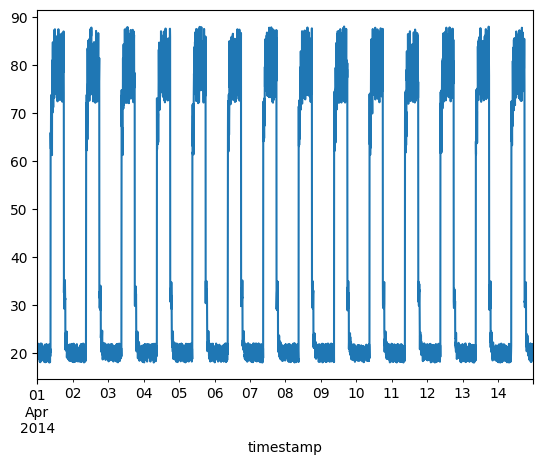

In [76]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

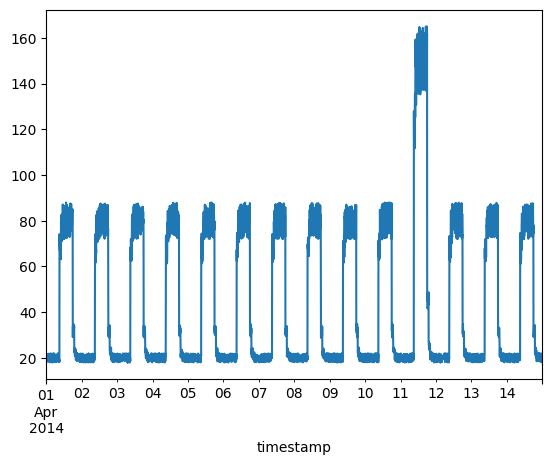

In [77]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

Number of training samples: 4032
Training input shape:  (3745, 288, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_10 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_15 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_11 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_16 (Conv1D  (None, 288, 32)    

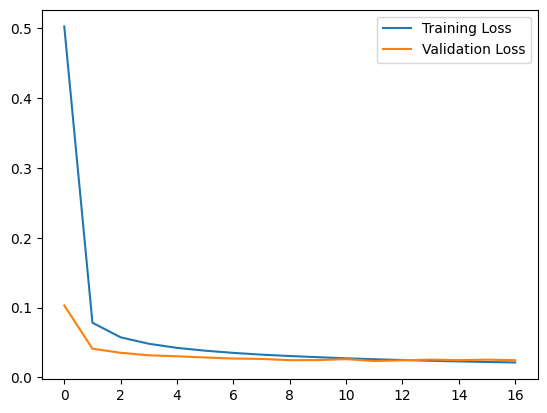

118/118 [==============================] - 1s 3ms/step


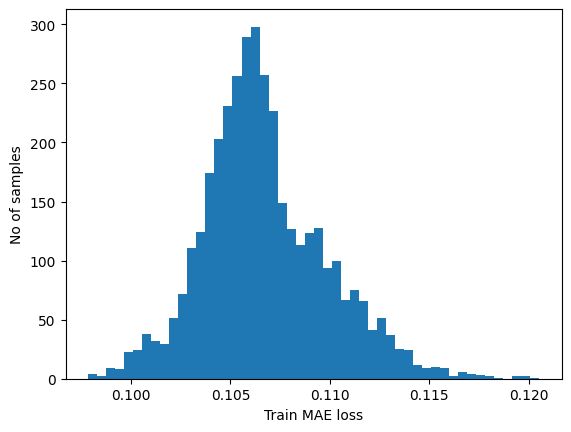

Reconstruction error threshold:  0.12052940832329097


"\n### Compare recontruction\n\nJust for fun, let's see how our model has recontructed the first sample.\nThis is the 288 timesteps from day 1 of our training dataset.\n"

In [78]:
"""
## Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total
"""


# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

"""
### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.
"""

TIME_STEPS = 288


# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

"""
## Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.
"""

model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

"""
## Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.
"""

history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

"""
Let's plot training and validation loss to see how the training went.
"""

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

"""
## Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.


"""

# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

"""
### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.
"""

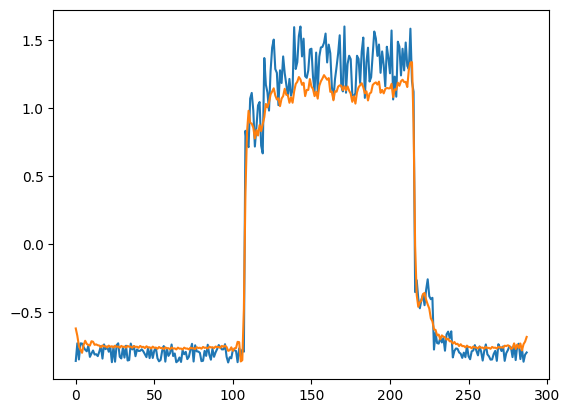

In [79]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

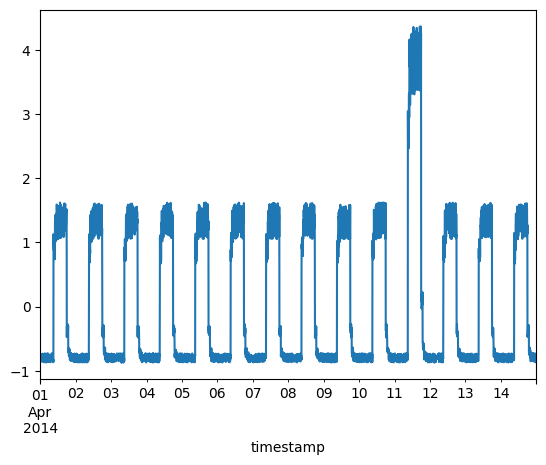

Test input shape:  (3745, 288, 1)


In [80]:
"""
### Prepare test data
"""


df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

118/118 [==============================] - 0s 3ms/step


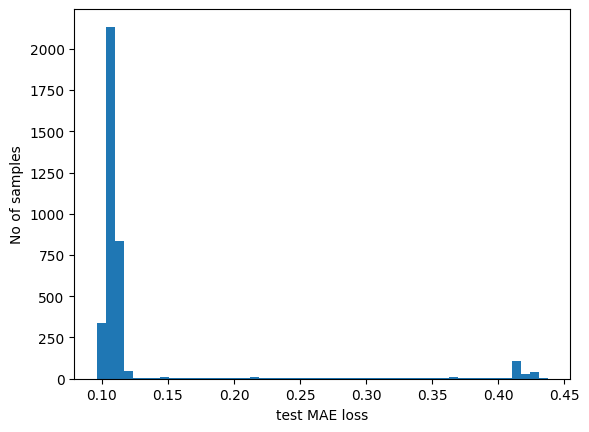

In [81]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [82]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

"""
## Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.
"""

# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Number of anomaly samples:  405
Indices of anomaly samples:  (array([ 789,  969, 1652, 1659, 2517, 2519, 2522, 2523, 2525, 2697, 2701,
       2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712,
       2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723,
       2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734,
       2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745,
       2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756,
       2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767,
       2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778,
       2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789,
       2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800,
       2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811,
       2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822,
       2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2

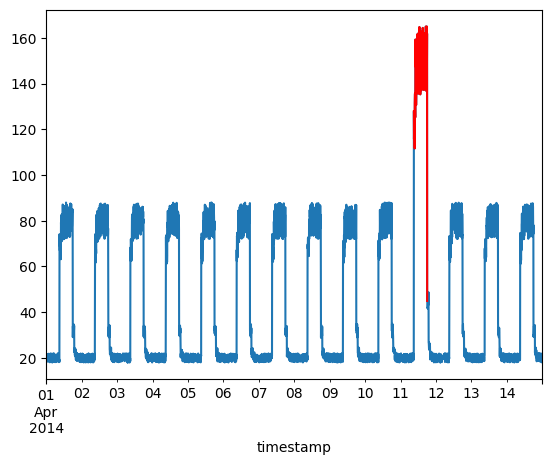

In [83]:
"""
Let's overlay the anomalies on the original test data plot.
"""

df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

## Hands-on 3
1. Use the get_dataset() function defined before to generate data  
2. Use an outlier detection method mentioned before to manually find outliers  
3. Rule out the outliers  
4. fit a linear regression  
5. plot results  

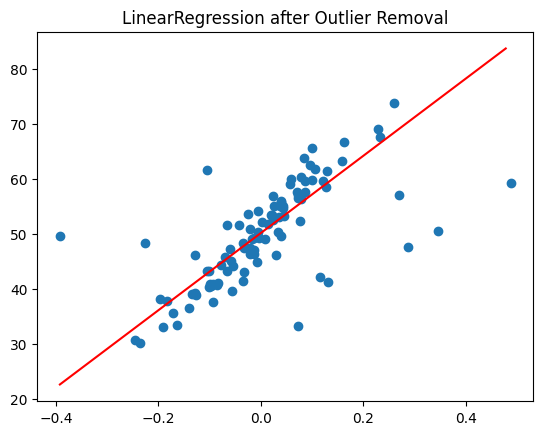

In [84]:
from random import random, randint, seed
from sklearn.datasets import make_regression
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pyplot
import numpy as np

# prepare the dataset
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
    # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

# Get dataset
X, y = get_dataset()

# Apply Isolation Forest for outlier detection
iforest = IsolationForest(n_estimators=100, contamination=0.05) # contamination refers to the portion of outliers in the data
pred = iforest.fit_predict(X)
anom_index = np.where(pred == -1)
new_X = X[pred != -1]
new_y = y[pred != -1]

# Fit linear regression model
model = LinearRegression()
model.fit(new_X, new_y)

# plot the dataset
pyplot.scatter(X, y)
# plot the line of best fit
xaxis = np.arange(X.min(), X.max(), 0.01)
yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
pyplot.plot(xaxis, yaxis, color='r')
# show the plot
pyplot.title(f"{type(model).__name__} after Outlier Removal")
pyplot.show()